In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [7]:
subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
     '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', 
     '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_cCRE.yaml',
     '-o', 'cCRE_pred.npy'],
    cwd='..'
)

use new config: configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_cCRE.yaml


100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_cCRE.yaml', '-o', 'cCRE_pred.npy'], returncode=0)

In [8]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

MPRA_df = pd.read_csv('../data/cCRE/cCRE_5_cell_types_Sei_feature_0617_norm.csv')
MPRA_df

,chr,start,end,name_1,name_2,cCRE_type,K562_cCRE_type,HepG2_cCRE_type,SK-N-SH_cCRE_type,HCT116_cCRE_type,A549_cCRE_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,chr1,115562,115912,EH38F0000002,EH38E3951280,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CAGATTATACTACAGTGAAAGTTGCCAATGACAAGGCAAAGTCACT...,0.388,0.867,1.293,0.687,1.022,0.379,-0.929,0.294,-0.775,0.033,0.181,-0.151,0.272,-0.191,NaN,0.093,-0.417,0.459,0.401,-0.012,NaN,0.508,NaN,0.056,-0.487,-0.217,-0.071,-0.609,-0.457,-0.412,NaN,0.025,-0.305,-0.071,0.353,NaN,0.231,NaN,-0.315,0.093
1,chr1,138917,139112,EH38D6144710,EH38E3951286,pELS,pELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,GAGGCAGGAGCTGGGCCTGGACAGGTCAACTTGAGGAGATTTTGGG...,1.039,-0.478,-0.301,-1.076,-0.396,0.404,0.574,1.934,0.897,-0.291,-0.208,-1.005,-0.782,0.369,NaN,2.093,0.273,-0.589,-0.469,-0.656,NaN,1.263,NaN,1.899,1.303,-0.166,-0.123,0.178,-0.211,0.264,NaN,2.100,1.071,-0.655,-0.300,NaN,-0.744,NaN,0.332,2.034
2,chr1,181014,181237,EH38D4327524,EH38E2776523,CA-H3K4me3,Low-DNase,Low-DNase,Low-DNase,CA-only,Low-DNase,GGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTT...,1.979,1.828,1.420,0.047,0.473,1.030,1.167,0.783,1.415,1.499,0.821,0.031,-0.150,1.200,NaN,0.575,1.878,1.802,0.966,0.122,NaN,-0.188,NaN,0.814,1.050,1.528,0.864,0.080,0.323,0.730,NaN,0.405,1.401,1.435,1.168,NaN,0.034,NaN,0.816,0.541
3,chr1,181289,181639,EH38D4327525,EH38E2776524,CA-H3K4me3,CA-CTCF,CA-TF,CA-TF,CA-only,CA-only,CGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGC...,1.582,0.850,0.811,-1.464,-0.467,1.042,1.365,0.150,1.114,0.389,0.321,-1.230,-0.825,1.218,NaN,-0.026,1.664,0.599,-0.046,-1.221,NaN,-0.475,NaN,0.318,1.123,0.578,0.508,-0.944,0.112,1.115,NaN,0.022,1.244,0.814,0.727,NaN,-0.425,NaN,1.250,-0.015
4,chr1,191294,191644,EH38D4327540,EH38E2776526,dELS,Low-DNase,Low-DNase,CA-only,Low-DNase,Low-DNase,ATCAGCAGGGACCGTGCACTCTCTTGGAGCCACCACAGAAAGCAGA...,-0.296,0.027,-0.405,1.083,0.051,0.245,1.452,-0.284,0.386,0.549,0.146,1.355,0.507,0.699,NaN,-0.077,1.513,0.458,-0.009,1.609,NaN,0.327,NaN,0.231,-0.431,-0.255,-0.804,-0.056,-0.434,1.048,NaN,-0.521,-0.647,-0.373,-0.523,NaN,-0.518,NaN,0.405,-0.372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368033,chrY,20828581,20828904,EH38D6144374,EH38E3951144,dELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CA-TF,TGGAAGAATTTAAAACAGAAATACCAGGCTGGGCGCGGTGGCTCAG...,-0.460,0.092,0.161,-1.052,-0.673,-0.335,1.006,-0.778,0.093,0.669,1.182,-1.516,-0.932,-0.522,NaN,-0.530,-1.761,0.116,0.909,-1.021,NaN,-0.525,NaN,-0.916,0.081,0.901,1.263,-1.193,1.357,-0.292,NaN,-0.509,-0.031,0.755,1.159,NaN,0.371,NaN,-0.217,-0.657
368034,chrY,21021830,21022179,EH38D6144412,EH38E3951161,dELS,Low-DNase,dELS,Low-DNase,Low-DNase,Low-DNase,GCCAGTGGAAATCTTGTTGGGTTTCTCTCGTCCCACTAATGTTACC...,0.241,0.178,0.521,0.303,1.410,1.742,-0.389,-0.460,2.332,1.529,2.781,0.141,2.623,0.728,NaN,0.253,0.272,0.912,2.590,0.672,NaN,1.263,NaN,-0.089,1.660,0.866,2.127,-0.969,2.107,0.444,NaN,0.048,2.333,1.187,1.535,NaN,1.571,NaN,1.307,0.217
368035,chrY,26315142,26315389,EH38D4327358,EH38E2776433,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,CA-TF,AATCTGCATTCCCTATACTAAAACACTTAAATGGAATGGGATAGAA...,1.167,-0.419,-0.651,0.098,-0.717,0.155,-0.935,2.006,0.654,-0.324,-0.908,-1.319,-0.765,-0.448,NaN,2.187,0.958,0.277,-0.032,-1.133,NaN,0.132,NaN,2.293,1.443,-0.137,-0.389,0.797,-0.374,-1.095,NaN,2.135,1.599,0.150

In [9]:
# y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3_600bp/0507_112907/cCRE_pred.npy')
y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/cCRE_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred
MPRA_df

,chr,start,end,name_1,name_2,cCRE_type,K562_cCRE_type,HepG2_cCRE_type,SK-N-SH_cCRE_type,HCT116_cCRE_type,A549_cCRE_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,K562_pred,HepG2_pred,SK-N-SH_pred,HCT116_pred,A549_pred
0,chr1,115562,115912,EH38F0000002,EH38E3951280,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CAGATTATACTACAGTGAAAGTTGCCAATGACAAGGCAAAGTCACT...,0.388,0.867,1.293,0.687,1.022,0.379,-0.929,0.294,-0.775,0.033,0.181,-0.151,0.272,-0.191,NaN,0.093,-0.417,0.459,0.401,-0.012,NaN,0.508,NaN,0.056,-0.487,-0.217,-0.071,-0.609,-0.457,-0.412,NaN,0.025,-0.305,-0.071,0.353,NaN,0.231,NaN,-0.315,0.093,-0.422,-0.593,-0.555,-0.664,-0.603
1,chr1,138917,139112,EH38D6144710,EH38E3951286,pELS,pELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,GAGGCAGGAGCTGGGCCTGGACAGGTCAACTTGAGGAGATTTTGGG...,1.039,-0.478,-0.301,-1.076,-0.396,0.404,0.574,1.934,0.897,-0.291,-0.208,-1.005,-0.782,0.369,NaN,2.093,0.273,-0.589,-0.469,-0.656,NaN,1.263,NaN,1.899,1.303,-0.166,-0.123,0.178,-0.211,0.264,NaN,2.100,1.071,-0.655,-0.300,NaN,-0.744,NaN,0.332,2.034,-0.248,0.073,-0.177,-0.163,-0.320
2,chr1,181014,181237,EH38D4327524,EH38E2776523,CA-H3K4me3,Low-DNase,Low-DNase,Low-DNase,CA-only,Low-DNase,GGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTT...,1.979,1.828,1.420,0.047,0.473,1.030,1.167,0.783,1.415,1.499,0.821,0.031,-0.150,1.200,NaN,0.575,1.878,1.802,0.966,0.122,NaN,-0.188,NaN,0.814,1.050,1.528,0.864,0.080,0.323,0.730,NaN,0.405,1.401,1.435,1.168,NaN,0.034,NaN,0.816,0.541,3.737,3.988,4.218,4.446,3.499
3,chr1,181289,181639,EH38D4327525,EH38E2776524,CA-H3K4me3,CA-CTCF,CA-TF,CA-TF,CA-only,CA-only,CGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGC...,1.582,0.850,0.811,-1.464,-0.467,1.042,1.365,0.150,1.114,0.389,0.321,-1.230,-0.825,1.218,NaN,-0.026,1.664,0.599,-0.046,-1.221,NaN,-0.475,NaN,0.318,1.123,0.578,0.508,-0.944,0.112,1.115,NaN,0.022,1.244,0.814,0.727,NaN,-0.425,NaN,1.250,-0.015,5.100,4.990,4.705,4.937,4.921
4,chr1,191294,191644,EH38D4327540,EH38E2776526,dELS,Low-DNase,Low-DNase,CA-only,Low-DNase,Low-DNase,ATCAGCAGGGACCGTGCACTCTCTTGGAGCCACCACAGAAAGCAGA...,-0.296,0.027,-0.405,1.083,0.051,0.245,1.452,-0.284,0.386,0.549,0.146,1.355,0.507,0.699,NaN,-0.077,1.513,0.458,-0.009,1.609,NaN,0.327,NaN,0.231,-0.431,-0.255,-0.804,-0.056,-0.434,1.048,NaN,-0.521,-0.647,-0.373,-0.523,NaN,-0.518,NaN,0.405,-0.372,-0.086,0.679,1.539,0.174,-0.068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368033,chrY,20828581,20828904,EH38D6144374,EH38E3951144,dELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CA-TF,TGGAAGAATTTAAAACAGAAATACCAGGCTGGGCGCGGTGGCTCAG...,-0.460,0.092,0.161,-1.052,-0.673,-0.335,1.006,-0.778,0.093,0.669,1.182,-1.516,-0.932,-0.522,NaN,-0.530,-1.761,0.116,0.909,-1.021,NaN,-0.525,NaN,-0.916,0.081,0.901,1.263,-1.193,1.357,-0.292,NaN,-0.509,-0.031,0.755,1.159,NaN,0.371,NaN,-0.217,-0.657,2.052,2.315,2.230,2.355,2.313
368034,chrY,21021830,21022179,EH38D6144412,EH38E3951161,dELS,Low-DNase,dELS,Low-DNase,Low-DNase,Low-DNase,GCCAGTGGAAATCTTGTTGGGTTTCTCTCGTCCCACTAATGTTACC...,0.241,0.178,0.521,0.303,1.410,1.742,-0.389,-0.460,2.332,1.529,2.781,0.141,2.623,0.728,NaN,0.253,0.272,0.912,2.590,0.672,NaN,1.263,NaN,-0.089,1.660,0.866,2.127,-0.969,2.107,0.444,NaN,0.048,2.333,1.187,1.535,NaN,1.571,NaN,1.307,0.217,0.029,2.122,0.848,1.269,1.367
368035,chrY,26315142,26315389,EH38D4327358,EH38E2776433,CA-CTCF,CA-CTCF

In [17]:
print(MPRA_df['cCRE_type'].value_counts())

cCRE_type
dELS          224530
pELS           88191
PLS            31929
CA-CTCF        10759
CA-H3K4me3      6146
CA-TF           4440
CA              2043
Name: count, dtype: int64


Mann-Whitney U Test (K562 vs HepG2 for each cCRE type):
PLS: U=209556595.50, p=4.6251e-14
pELS: U=906689589.50, p=1.1819e-20
dELS: U=706324905.00, p=1.9583e-173
CA-H3K4me3: U=17699291.00, p=4.2577e-03
CA-CTCF: U=390676800.50, p=4.0100e-06
CA-TF: U=867019389.00, p=6.0595e-281
CA-only: U=4626083.00, p=1.3110e-04
Low-DNase: U=18030724571.50, p=1.2544e-155


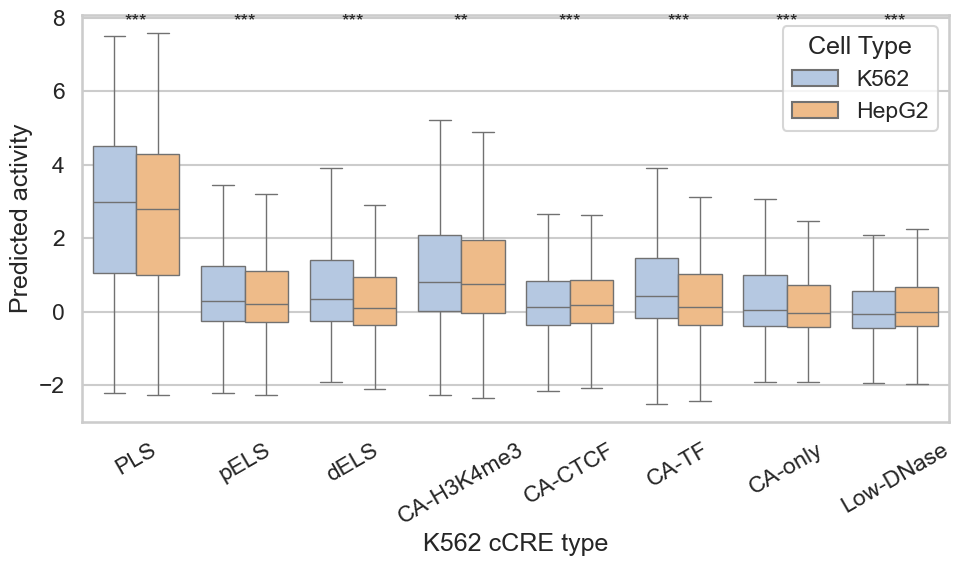

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# 只保留 K562 和 HepG2
cell_types = ['K562', 'HepG2']
cCRE_types = ['PLS', 'pELS', 'dELS', 'CA-H3K4me3', 'CA-CTCF', 'CA-TF', 'CA-only', 'Low-DNase']
pred_cols = [f'{ct}_pred' for ct in cell_types]

# 构造绘图数据
plot_df = []

for cCRE_type in cCRE_types:
    sub_df = MPRA_df[MPRA_df['K562_cCRE_type'] == cCRE_type]
    for ct in cell_types:
        tmp = sub_df[[f'{ct}_pred']].copy()
        tmp.columns = ['pred']
        tmp['cell_type'] = ct
        tmp['cCRE_type'] = cCRE_type
        plot_df.append(tmp)

plot_df = pd.concat(plot_df)

# 显著性检验
print("Mann-Whitney U Test (K562 vs HepG2 for each cCRE type):")
p_values = {}
for cCRE_type in cCRE_types:
    group = plot_df[plot_df['cCRE_type'] == cCRE_type]
    k562_vals = group[group['cell_type'] == 'K562']['pred']
    hepG2_vals = group[group['cell_type'] == 'HepG2']['pred']
    stat, p = mannwhitneyu(k562_vals, hepG2_vals, alternative='two-sided')
    p_values[cCRE_type] = p
    print(f"{cCRE_type}: U={stat:.2f}, p={p:.4e}")

# 绘图
sns.set_theme(context='talk', style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.9)

sns.boxplot(data=plot_df, x='cCRE_type', y='pred', hue='cell_type', showfliers=False, palette=tab20_colors[1::2])
plt.ylabel('Predicted activity')
plt.xlabel('K562 cCRE type')
plt.xticks(rotation=30)
plt.legend(title='Cell Type')

# 可选：加显著性标记（如星号）
y_max = plot_df['pred'].max()
for i, cCRE_type in enumerate(cCRE_types):
    p = p_values[cCRE_type]
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        continue  # 不显著就不标了
    ax.text(i, y_max + 0.05, star, ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.savefig('figures/cCRE_K562_HepG2_pred_activity_boxplot.png', dpi=400)
plt.show()


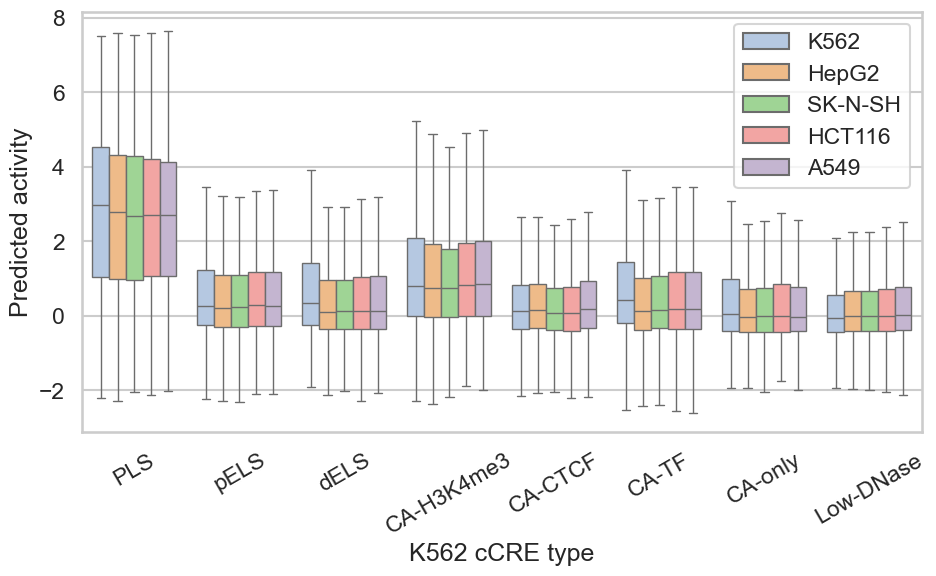

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 MPRA_df 已经加载好，并且包含 cCRE_type 和 {cell_type}_pred 列
cCRE_types = ['PLS', 'pELS', 'dELS', 'CA-H3K4me3', 'CA-CTCF', 'CA-TF', 'CA-only', 'Low-DNase']
pred_cols = [f'{ct}_pred' for ct in cell_types]

# 为 boxplot 做 melt
plot_df = []

for cCRE_type in cCRE_types:
    sub_df = MPRA_df[MPRA_df['K562_cCRE_type'] == cCRE_type]

    for ct in cell_types:
        tmp = sub_df[[f'{ct}_pred']].copy()
        tmp.columns = ['pred']
        tmp['cell_type'] = ct
        tmp['cCRE_type'] = cCRE_type
        plot_df.append(tmp)

plot_df = pd.concat(plot_df)

# 绘图
sns.set_theme(context='talk', style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

sns.boxplot(data=plot_df, x='cCRE_type', y='pred', hue='cell_type', showfliers=False, palette=tab20_colors[1::2])
plt.ylabel('Predicted activity')
plt.xlabel('K562 cCRE type')
plt.xticks(rotation=30)
plt.legend()
plt.savefig('figures/cCRE_K562_cCRE_type_pred_activity_boxplot.png', dpi=400)
plt.show()

In [12]:
cCRE_types = ['PLS', 'pELS', 'dELS', 'CA-H3K4me3', 'CA-CTCF', 'CA-TF', 'CA-only', 'Low-DNase']

for cCRE_type in cCRE_types:
    df = MPRA_df[MPRA_df[f'cCRE_type'] == cCRE_type]
    cols = [f'{cell_type}_pred' for cell_type in cell_types]
    print(cCRE_type)
    print(df[cols].mean(), df[cols].std())


PLS
K562_pred      2.209
HepG2_pred     2.108
SK-N-SH_pred   2.078
HCT116_pred    2.117
A549_pred      2.095
dtype: float32 K562_pred      1.998
HepG2_pred     1.917
SK-N-SH_pred   1.916
HCT116_pred    1.897
A549_pred      1.853
dtype: float32
pELS
K562_pred      0.500
HepG2_pred     0.459
SK-N-SH_pred   0.454
HCT116_pred    0.501
A549_pred      0.506
dtype: float32 K562_pred      1.152
HepG2_pred     1.106
SK-N-SH_pred   1.081
HCT116_pred    1.100
A549_pred      1.104
dtype: float32
dELS
K562_pred      0.325
HepG2_pred     0.293
SK-N-SH_pred   0.281
HCT116_pred    0.319
A549_pred      0.355
dtype: float32 K562_pred      1.051
HepG2_pred     0.990
SK-N-SH_pred   0.975
HCT116_pred    1.033
A549_pred      1.040
dtype: float32
CA-H3K4me3
K562_pred      0.408
HepG2_pred     0.355
SK-N-SH_pred   0.326
HCT116_pred    0.352
A549_pred      0.387
dtype: float32 K562_pred      1.198
HepG2_pred     1.148
SK-N-SH_pred   1.121
HCT116_pred    1.171
A549_pred      1.145
dtype: float32
CA-CTCF
K562_pr

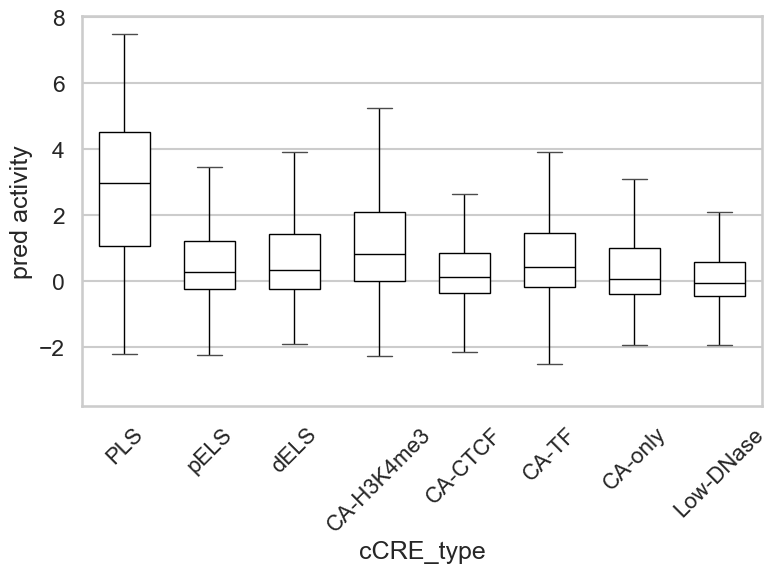

In [10]:
cCRE_types = ['PLS', 'pELS', 'dELS', 'CA-H3K4me3', 'CA-CTCF', 'CA-TF', 'CA-only', 'Low-DNase']

plot_data = []
for cell_type in cell_types[:1]:
    for cCRE_type in cCRE_types:
        df = MPRA_df[MPRA_df[f'{cell_type}_cCRE_type'] == cCRE_type]
        values = df[f'{cell_type}_pred'].dropna()
        # plot_data.append(values)
        for v in values:
            plot_data.append({
                "cCRE_type": cCRE_type,
                "pred": v
            })
            
plot_df = pd.DataFrame(plot_data)
x = plot_df['cCRE_type']
y = plot_df['pred']


plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.1, bottom=0.3, right=0.95, top=0.95)
sns.boxplot(x=x, y=y, 
            fliersize=0, width=0.6,
            boxprops={"facecolor":"white", "edgecolor":"black"},
            whiskerprops={"color":"black"},
            medianprops={"color":"black"})
plt.ylabel('pred activity')
plt.xticks(fontsize=16, rotation=45)
plt.savefig('figures/cCRE_K562_boxplot.png', dpi=400)

In [4]:

pearson_df = pd.DataFrame(dtype=float)

for cell_type in cell_types:
    for cell_type_2 in cell_types:
        # condition_1 = data_split_dict['total']
        # condition_2 = data_split_dict[f'{cell_type}_specific']
        # df = MPRA_df[condition_1 & condition_2]
        df = MPRA_df
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, cell_type_2] = r
print('specific')
print(pearson_df)



KeyError: 'K562'

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000 0.825
A549    0.724  0.730    0.777   0.825 1.000


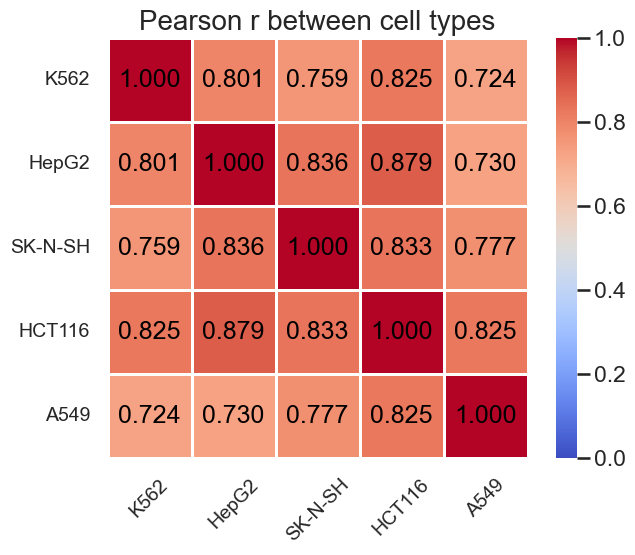

diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.471    0.453   0.516 0.561
HepG2   0.471  1.000    0.622   0.675 0.617
SK-N-SH 0.453  0.622    1.000   0.649 0.771
HCT116  0.516  0.675    0.649   1.000 0.821
A549    0.561  0.617    0.771   0.821 1.000


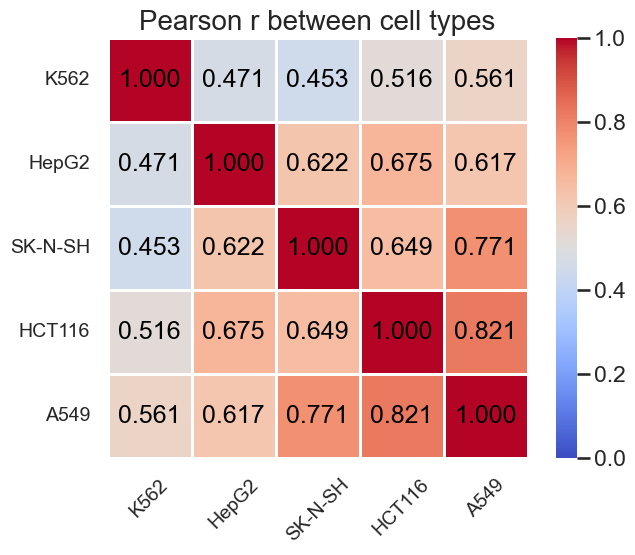

In [37]:
for data_split in ['total', 'diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, cell_type_2] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
    plt.show()

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.817       0.781         0.787        0.793      0.789
HepG2        0.834       0.851         0.832        0.836      0.842
SK-N-SH      0.800       0.796         0.821        0.797      0.795
HCT116       0.817       0.817         0.815        0.824      0.815
A549         0.710       0.710         0.717        0.727      0.729


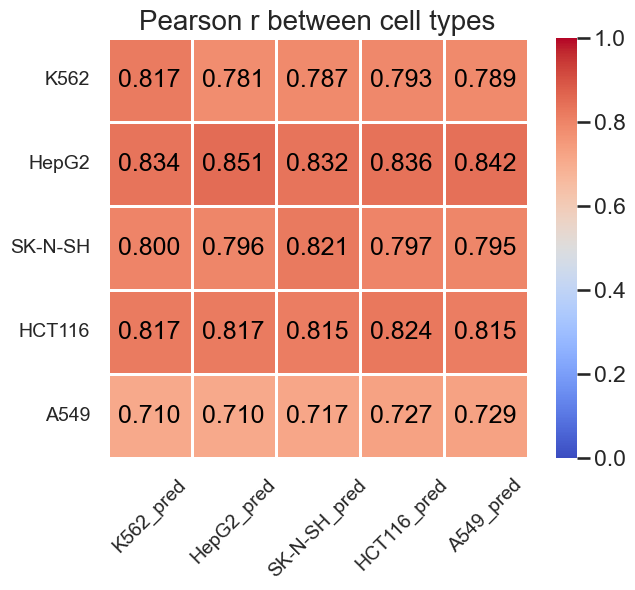

test_diff
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.708       0.570         0.611        0.608      0.592
HepG2        0.661       0.748         0.677        0.695      0.726
SK-N-SH      0.627       0.608         0.704        0.643      0.628
HCT116       0.696       0.684         0.698        0.742      0.701
A549         0.660       0.695         0.714        0.706      0.705


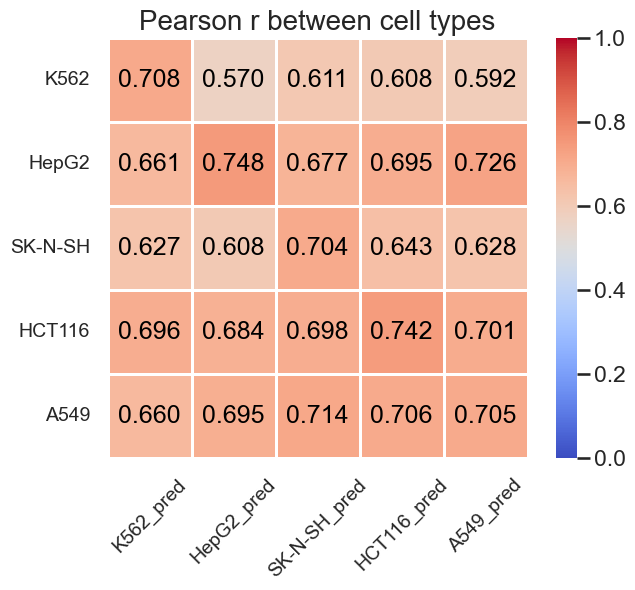

In [38]:
for data_split in ['test', 'test_diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    #plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0.0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_{data_split}.png', dpi=400)
    plt.show()